<a href="https://colab.research.google.com/github/tpeterz/happy-flix/blob/main/Alternative_Model_Testing/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This file contain an alternative analysis of our dataset
# Used below:
- KMeans

In [ ]:
# Import required packages
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
!pip install --upgrade scikit-learn


In [ ]:
# Load your data
file_name = "combined_movies.csv"
movie_df = pd.read_csv(file_name)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Tokenize the reviews
X = vectorizer.fit_transform(movie_df['reviews'])

In [ ]:
from sklearn.cluster import KMeans

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the algorithm to your data
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [ ]:
# Get the cluster labels
labels = kmeans.labels_

# Add the labels to your DataFrame
movie_df['cluster'] = labels

In [ ]:
# Example: Get the top terms for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(6):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]: # Replace 10 with however many terms you want to see
        print(f" {terms[ind]}")

Cluster 0:
 the
 and
 of
 to
 this
 it
 movie
 is
 in
 was
Cluster 1:
 the
 and
 of
 to
 is
 in
 it
 that
 as
 with
Cluster 2:
 the
 and
 of
 to
 is
 it
 in
 that
 this
 as
Cluster 3:
 em
 the
 it
 is
 and
 of
 to
 in
 but
 as
Cluster 4:
 the
 it
 and
 to
 of
 was
 is
 in
 that
 but
Cluster 5:
 the
 it
 and
 to
 of
 that
 is
 but
 movie
 this


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the data to the first two principal components
X_pca = pca.fit_transform(X.toarray())

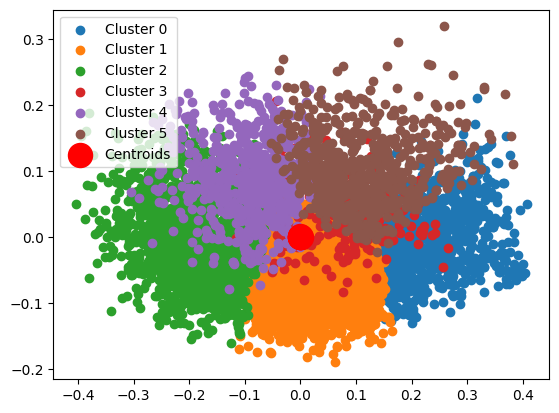

In [ ]:
import matplotlib.pyplot as plt

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clusters
for i in range(6): # Assuming 6 clusters
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')

plt.legend()
plt.show()